In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 0.1 
beta = 0.02
delta = 0.01
gamma = 0.1

In [3]:
N0 = 40
P0 = 9
T = 100

In [4]:
r = 0.3

In [5]:
def f(N, P):
    return alpha*N - beta*N*P*(1-r)

def g(N, P):
    return -gamma*P + delta*N*P

In [6]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

In [7]:
# Estimate by Runge-Kutta Method
N_rk = np.zeros(len(t))
N_rk[0] = N0

P_rk = np.zeros(len(t))
P_rk[0] = P0

for i in range(1, len(t)):    
    xk1 = f(N_rk[i-1], P_rk[i-1])
    yk1 = g(N_rk[i-1], P_rk[i-1])
    xk2 = f(N_rk[i-1] + xk1 * dt/2, P_rk[i-1] + yk1 * dt/2)
    yk2 = g(N_rk[i-1] + xk1 * dt/2, P_rk[i-1] + yk1 * dt/2)
    xk3 = f(N_rk[i-1] + xk2 * dt/2, P_rk[i-1] + yk2 * dt/2)
    yk3 = g(N_rk[i-1] + xk2 * dt/2, P_rk[i-1] + yk2 * dt/2)
    xk4 = f(N_rk[i-1] + xk3 * dt, P_rk[i-1] + yk3 * dt)
    yk4 = g(N_rk[i-1] + xk3 * dt, P_rk[i-1] + yk3 * dt)

    N_rk[i] = N_rk[i-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    P_rk[i] = P_rk[i-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)

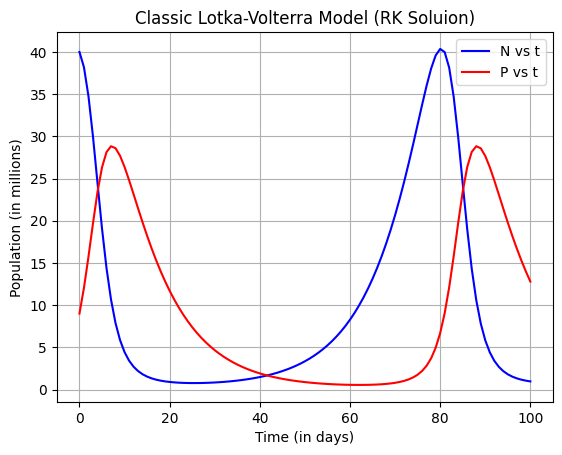

In [8]:
plt.plot(t, N_rk, label='N vs t', color='blue')
plt.plot(t, P_rk, label='P vs t', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('Lotka-Volterra Model (with Refuge for Prey)')
plt.legend()
plt.grid()

plt.show()